In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = pd.read_csv('bank.csv', delimiter=';')
data1 = np.genfromtxt("bank.csv", delimiter=";").transpose()

reg = LogisticRegression()

In [273]:
x1 = np.array([data['age'].tolist()]).reshape(-1,1)
x1

array([[30],
       [33],
       [35],
       ...,
       [57],
       [28],
       [44]])

In [274]:
y1 = np.array(data['marital'] == 'married').astype(int)
y1

array([1, 1, 0, ..., 1, 1, 0])

In [275]:
reg.fit(x1,y1)
x2 = np.linspace(0,5000,1000).reshape(-1,1)
y2 = reg.predict_proba(x2)
y2

array([[0.8787 , 0.1213 ],
       [0.84209, 0.15791],
       [0.79697, 0.20303],
       ...,
       [0.     , 1.     ],
       [0.     , 1.     ],
       [0.     , 1.     ]])

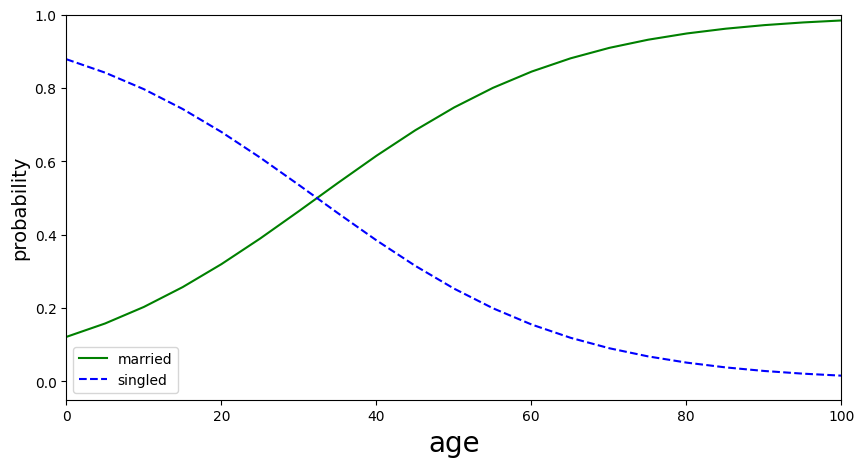

In [276]:
plt.figure(figsize=(10,5))
plt.plot(x2,y2[:,1],'g-',label = 'married')
plt.plot(x2,y2[:,0],'b--',label = 'singled')
plt.xlabel('age',fontsize = 20)
plt.ylabel('probability',fontsize = 14)
plt.axis([0,100,-0.05,1])
plt.legend()

In [277]:
#x2 = np.array([data['age'].tolist()]).reshape(-1,1)
t1 = np.array([data['age'].tolist()]).reshape(-1,1)
t2 = np.array([data['balance'].tolist()]).reshape(-1,1)
y2 = np.array(data['marital'] == 'married').astype(int)

n = t1.shape[0]
x2 = np.ones((n, 2))
x2[:, 0] = t1.flatten()
x2[:, 1] = t2.flatten()
x2

array([[  30., 1787.],
       [  33., 4789.],
       [  35., 1350.],
       ...,
       [  57.,  295.],
       [  28., 1137.],
       [  44., 1136.]])

In [278]:
reg1 = LogisticRegression()
reg1.fit(x2,y2)

LogisticRegression()

age:

min = 19, max = 87

balance:

min = -3313, max = 71188

In [279]:
x2_0,x2_1 = np.meshgrid(np.linspace(20.0,100.0,200).reshape(-1,1),np.linspace(-3313.0,72188.0, 100).reshape(-1,1))
x2n = np.c_[x2_0.ravel(),x2_1.ravel()]
x2n

array([[   20.     , -3313.     ],
       [   20.40201, -3313.     ],
       [   20.80402, -3313.     ],
       ...,
       [   99.19598, 72188.     ],
       [   99.59799, 72188.     ],
       [  100.     , 72188.     ]])

In [280]:
yp = reg1.predict_proba(x2n)
yp

array([[0.67695, 0.32305],
       [0.67154, 0.32846],
       [0.66608, 0.33392],
       ...,
       [0.02126, 0.97874],
       [0.02076, 0.97924],
       [0.02026, 0.97974]])

(17.0, 90.0, -3400.0, 8000.0)

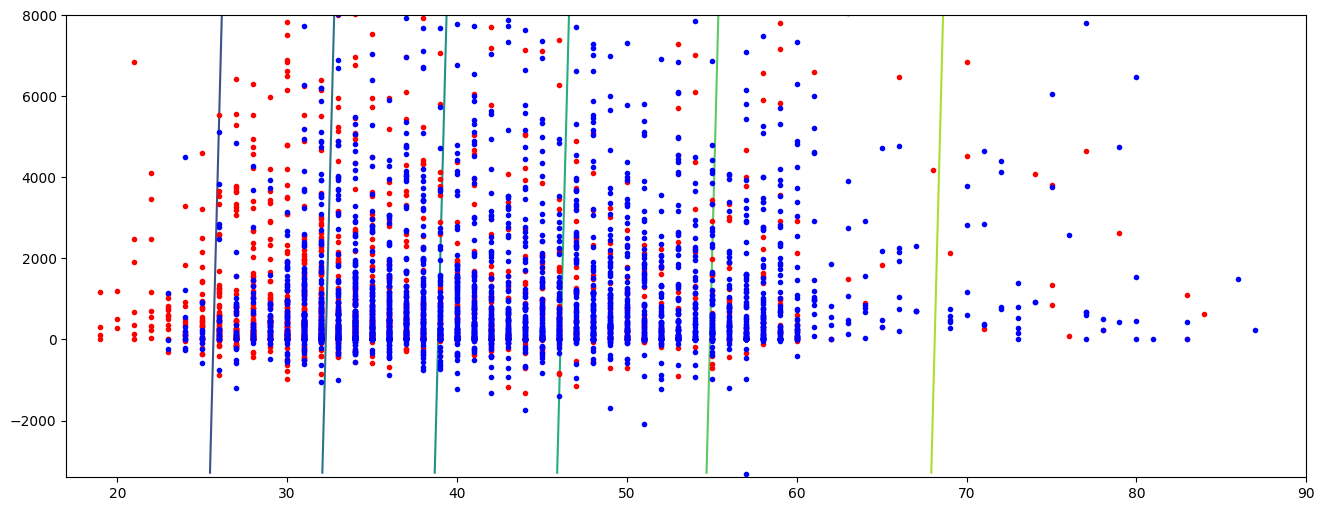

In [290]:
plt.figure(figsize=(16,6))
plt.plot(x2[y2==0,0],x2[y2==0,1],'r.')
plt.plot(x2[y2==1,0],x2[y2==1,1],'b.')

z = yp[:,1].reshape(x2_0.shape)
temp = plt.contour(x2_0,x2_1,z)
plt.clabel(temp,inline = 1)
plt.axis([17,90,-3400,8000])